In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
%matplotlib inline
matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = [12, 6]

from datetime import timedelta
import datetime as dt

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# my own module
from conf.configure import Configure
from utils import data_utils
from utils import dataframe_util

In [2]:
train, test = data_utils.load_dataset('2')

In [3]:
train.head()

,dropoff_latitude,dropoff_longitude,id,is_store_and_fwd_flag,passenger_count,pickup_latitude,pickup_longitude,vendor_id,pickup_pca0,pickup_pca1,...,lat_long_manhattan,lat_long_center_latitude,lat_long_center_longitude,pca_distance_haversine,pca_distance_dummy_manhattan,pca_direction,pca_manhattan,pca_center_latitude,pca_center_longitude,trip_duration
0,40.765602,-73.964630,id2875421,0,1,40.767937,-73.982155,2,0.007691,0.017053,...,0.020716,40.766769,-73.973392,1.965875,2.303519,-169.049510,0.020716,-0.000988,0.015374,455
1,40.731152,-73.999481,id2377394,0,1,40.738564,-73.980415,1,0.007677,-0.012371,...,0.025749,40.734858,-73.989948,2.274593,2.863127,-17.881483,0.025749,0.017411,-0.015512,663
2,40.710087,-74.005333,id3858529,0,1,40.763939,-73.979027,2,0.004803,0.012879,...,0.081636,40.737013,-73.992180,6.664334,9.077491,-60.602607,0.081636,0.019513,-0.013229,2124
3,40.706718,-74.012268,id3504673,0,1,40.719971,-74.010040,2,0.038342,-0.029194,...,0.016100,40.713345,-74.011154,1.494260,1.790237,-77.095072,0.016100,0.039843,-0.035744,429
4,40.782520,-73.972923,id2181028,0,1,40.793209,-73.973053,2,-0.002877,0.041749,...,0.011175,40.787865,-73.972988,1.188626,1.242650,-87.332822,0.011175,-0.002628,0.036410,435


## Geography pca features

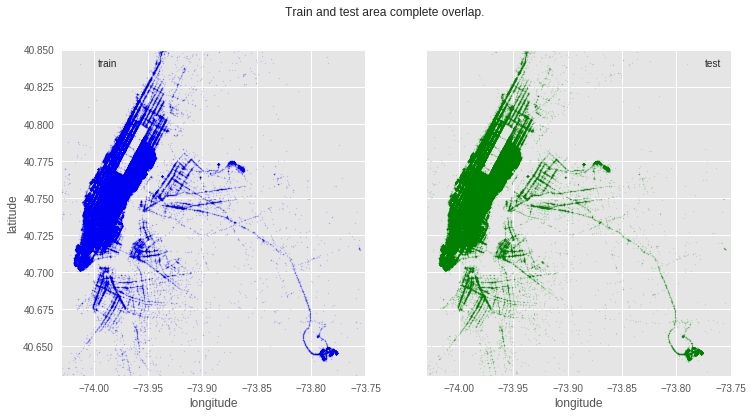

In [4]:
N = test.shape[0]
city_border_longitude = (-74.03, -73.75)
city_border_latitude = (40.63, 40.85)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(test['pickup_longitude'].values[:N], test['pickup_latitude'].values[:N],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_border_latitude)
plt.xlim(city_border_longitude)
plt.show()

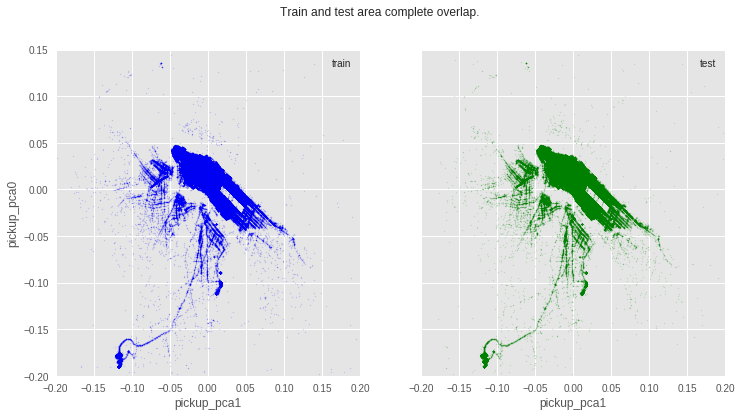

In [5]:
N = test.shape[0]
city_border_pca0 = (-0.2, 0.15)
city_border_pca1 = (-0.2, 0.2)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train['pickup_pca1'].values[:N], train['pickup_pca0'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(test['pickup_pca1'].values[:N], test['pickup_pca0'].values[:N],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('pickup_pca0')
ax[0].set_xlabel('pickup_pca1')
ax[1].set_xlabel('pickup_pca1')
ax[1].legend(loc=0)
plt.ylim(city_border_pca0)
plt.xlim(city_border_pca1)
plt.show()

In [6]:
test.head()

,dropoff_latitude,dropoff_longitude,id,is_store_and_fwd_flag,passenger_count,pickup_latitude,pickup_longitude,vendor_id,pickup_pca0,pickup_pca1,...,lat_long_direction,lat_long_manhattan,lat_long_center_latitude,lat_long_center_longitude,pca_distance_haversine,pca_distance_dummy_manhattan,pca_direction,pca_manhattan,pca_center_latitude,pca_center_longitude
0,40.756680,-73.990173,id3004672,0,1,40.732029,-73.988129,1,0.015761,-0.018442,...,-3.595224,0.025323,40.744354,-73.989151,2.750432,2.815838,88.620751,0.025323,0.016058,-0.006078
1,40.655403,-73.959808,id3505355,0,1,40.679993,-73.964203,1,-0.005072,-0.071792,...,172.278835,0.027750,40.667698,-73.962006,2.777553,3.085628,-96.770289,0.027750,-0.006544,-0.084195
2,40.729523,-73.986160,id1217141,0,1,40.737583,-73.997437,1,0.024727,-0.012352,...,133.326248,0.019492,40.733553,-73.991798,1.541262,2.167414,-141.079776,0.019492,0.019335,-0.016705
3,40.730469,-73.986427,id2150126,0,1,40.771900,-73.956070,2,-0.018581,0.019480,...,-150.956833,0.072315,40.751184,-73.971249,5.711278,8.041029,-50.406888,0.072315,-0.002214,-0.000310
4,40.755890,-73.961510,id1598245,0,1,40.761475,-73.970215,1,-0.003849,0.009902,...,130.260381,0.014448,40.758682,-73.965862,1.150040,1.606575,-143.955721,0.014448,-0.008031,0.006859


In [7]:
test.columns.values

array(['dropoff_latitude', 'dropoff_longitude', 'id',
       'is_store_and_fwd_flag', 'passenger_count', 'pickup_latitude',
       'pickup_longitude', 'vendor_id', 'pickup_pca0', 'pickup_pca1',
       'dropoff_pca0', 'dropoff_pca1', 'pickup_month', 'pickup_day',
       'pickup_hour', 'pickup_weekofyear', 'pickup_weekday', 'is_weekend',
       'pickup_time_delta', 'pickup_week_delta', 'pickup_week_delta_sin',
       'pickup_hour_sin', 'lat_long_distance_haversine',
       'lat_long_distance_dummy_manhattan', 'lat_long_direction',
       'lat_long_manhattan', 'lat_long_center_latitude',
       'lat_long_center_longitude', 'pca_distance_haversine',
       'pca_distance_dummy_manhattan', 'pca_direction', 'pca_manhattan',
       'pca_center_latitude', 'pca_center_longitude'], dtype=object)

**Data Cleaning**

乘车的区间的 latitude 和 longitude, 乘车距离

In [8]:
train.shape, test.shape

((1458633, 35), (625134, 34))

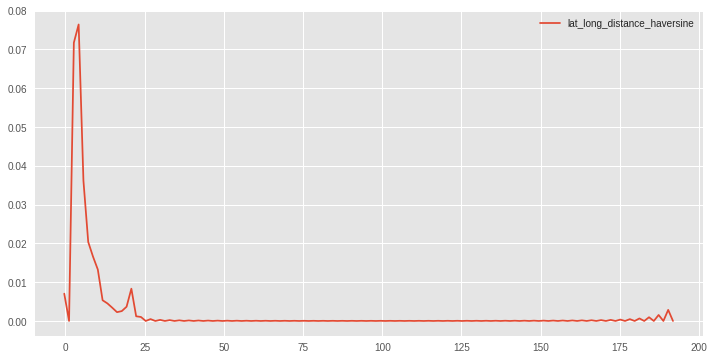

In [9]:
sns.kdeplot(train.lat_long_distance_haversine)

In [10]:
train['lat_long_distance_haversine'].describe().reset_index()

,index,lat_long_distance_haversine
0,count,1.458633e+06
1,mean,3.436808e+00
2,std,3.956578e+00
3,min,0.000000e+00
4,25%,1.231826e+00
5,50%,2.093694e+00
6,75%,3.875230e+00
7,max,1.914028e+02


In [11]:
check_columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_duration']

In [12]:
train[check_columns][train['lat_long_distance_haversine'] == 0]

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_duration
246,40.768963,-73.981819,40.768963,-73.981819,227
291,40.775661,-73.959068,40.775661,-73.959068,1109
407,40.687336,-73.808487,40.687336,-73.808487,947
702,40.647041,-73.786720,40.647041,-73.786720,580
1620,40.816853,-74.209854,40.816853,-74.209854,27
1728,40.645454,-73.776314,40.645454,-73.776314,19
1769,40.821003,-73.954666,40.821003,-73.954666,254
2087,40.777180,-73.954628,40.777180,-73.954628,248
2441,40.644699,-73.781830,40.644699,-73.781830,8
2609,40.773682,-73.875313,40.773682,-73.875313,1212


**乘客行驶的距离为 0, 但 trip_duration 的时间不为 0, 所以可能与当时乘车的路况有关, 是否拥挤最后选择没有上车! 除此说明需要对此情况单独处理进行纠正**

**distance vs  latitude 和 longitude vs trip_duration**

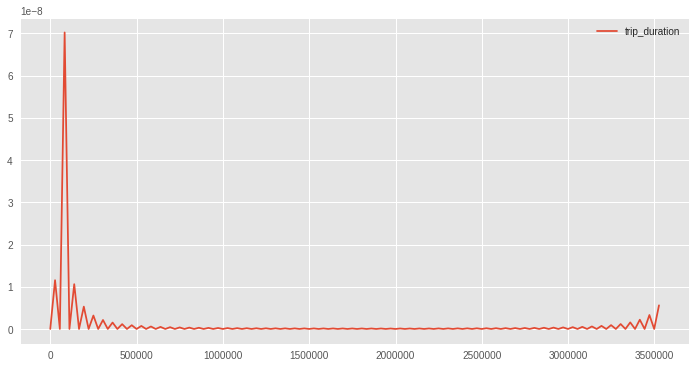

In [13]:
sns.kdeplot(train['trip_duration'])

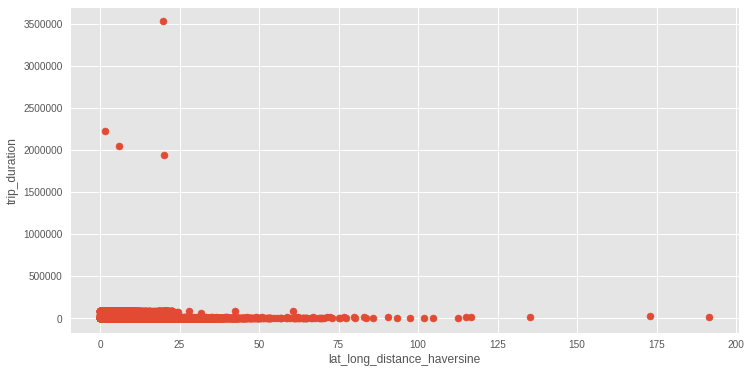

In [14]:
plt.scatter(train['lat_long_distance_haversine'], train['trip_duration'])
plt.xlabel('lat_long_distance_haversine')
plt.ylabel('trip_duration')

(-100, 90000)

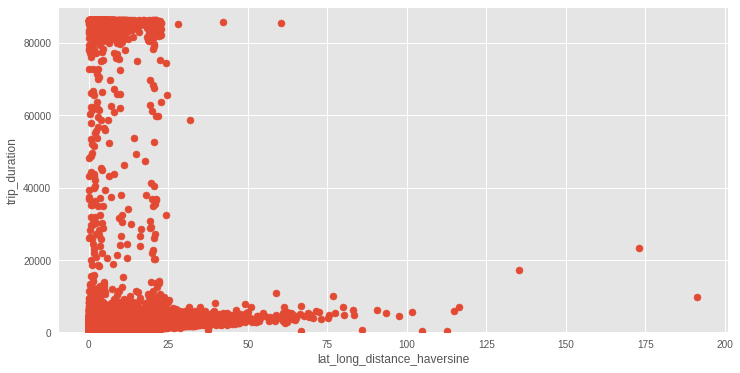

In [15]:
plt.scatter(train['lat_long_distance_haversine'], train['trip_duration'])
plt.xlabel('lat_long_distance_haversine')
plt.ylabel('trip_duration')
plt.ylim([-100, 90000])

存在两类异常值：

- 距离为 0, 时间不为 0 (左上角)
- 距离很大, 时间为0 (右下角)

In [16]:
check_columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'lat_long_distance_haversine', 'trip_duration']

In [17]:
train[check_columns][train['lat_long_distance_haversine'] > 200]

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,lat_long_distance_haversine,trip_duration


In [21]:
train = train[train['lat_long_distance_haversine'] < 200]
train = train[train['trip_duration'] < 500000]    # 过拟合, 实际代码中去掉

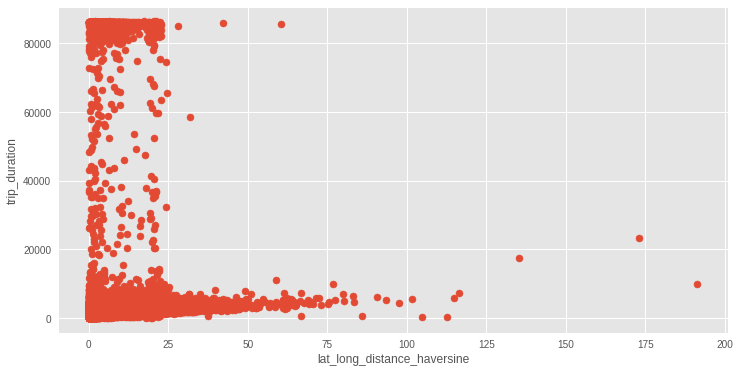

In [22]:
plt.scatter(train['lat_long_distance_haversine'], train['trip_duration'])
plt.xlabel('lat_long_distance_haversine')
plt.ylabel('trip_duration')

(-10, 20000)

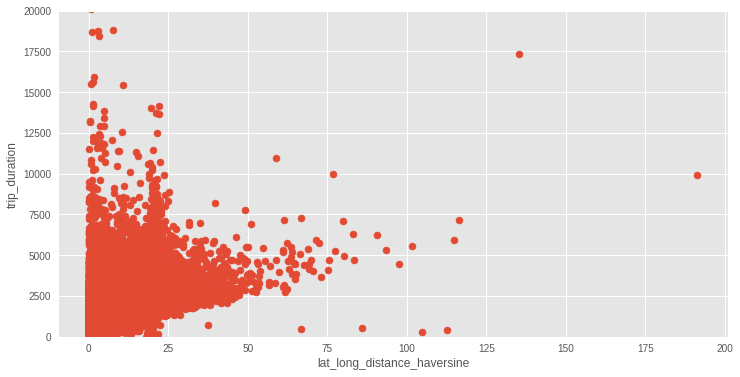

In [23]:
plt.scatter(train['lat_long_distance_haversine'], train['trip_duration'])
plt.xlabel('lat_long_distance_haversine')
plt.ylabel('trip_duration')
plt.ylim([-10, 20000])

(-5, 25)

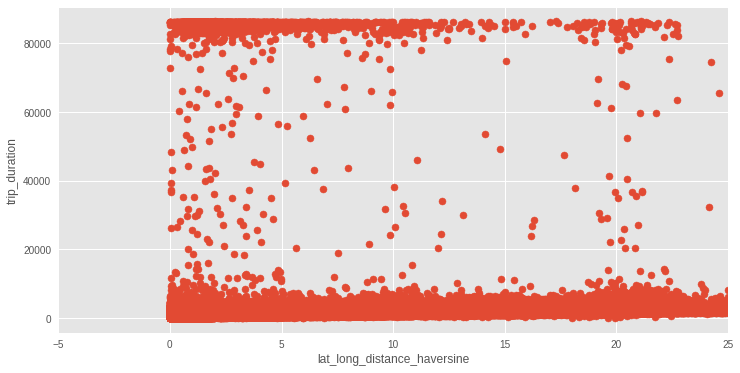

In [25]:
plt.scatter(train['lat_long_distance_haversine'], train['trip_duration'])
plt.xlabel('lat_long_distance_haversine')
plt.ylabel('trip_duration')
plt.xlim([-5, 25])

(-5, 20000)

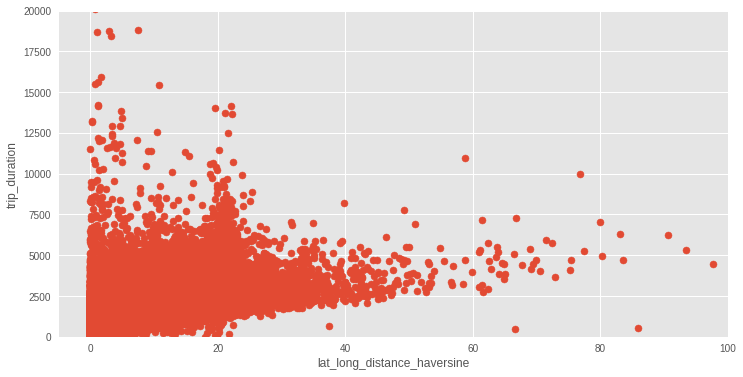

In [28]:
plt.scatter(train['lat_long_distance_haversine'], train['trip_duration'])
plt.xlabel('lat_long_distance_haversine')
plt.ylabel('trip_duration')
plt.xlim([-5, 100])
plt.ylim([-5, 20000])

**可以看出, lat_long_distance_haversine > 20 部分基本呈现线性模型, 所以需要线性模型+ [0,20]的纠正模型**

**Speed**

The feature speed is not available for the test data set. But it can help us to see what kind of pattern is there in the traffic.

In [31]:
train['speed'] = train['lat_long_distance_haversine'] / (train['trip_duration'] / 3600)

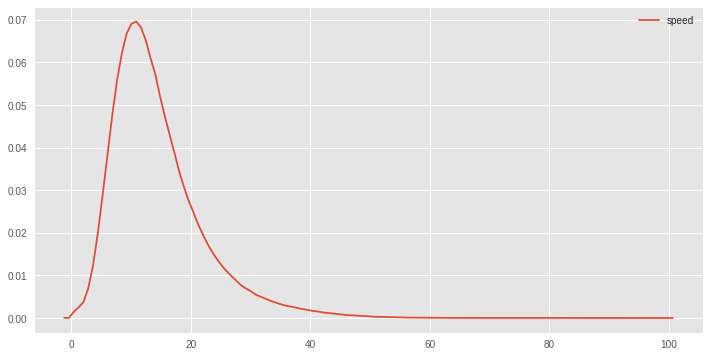

In [37]:
sns.kdeplot(train['speed'][train['speed'] < 100])

In [38]:
train['speed'].describe()

count    1.458629e+06
mean     1.440307e+01
std      1.156404e+01
min      0.000000e+00
25%      9.121275e+00
50%      1.279197e+01
75%      1.784468e+01
max      9.274837e+03
Name: speed, dtype: float64

There are certain rides with a speed of 9285km/h. We will investigate this in the Outlier Analysis part. But the average speed of 15km/h is reasonable.

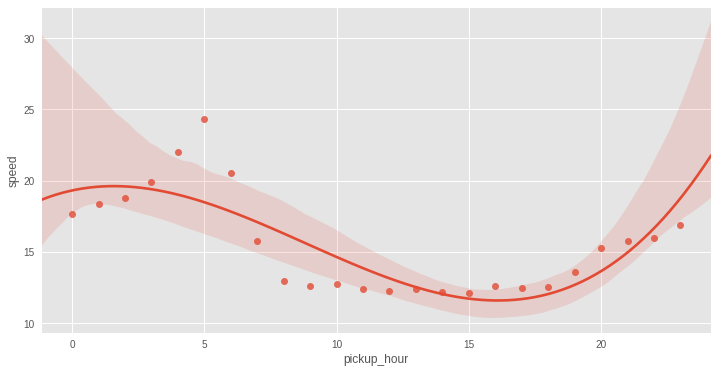

In [50]:
speed_hour = train.groupby(['pickup_hour']).mean()['speed'].reset_index()
sns.regplot(speed_hour['pickup_hour'], speed_hour['speed'], order=3)

可以看出, 夜间速度逐渐增大, 早晨 5 点后速度逐渐减小

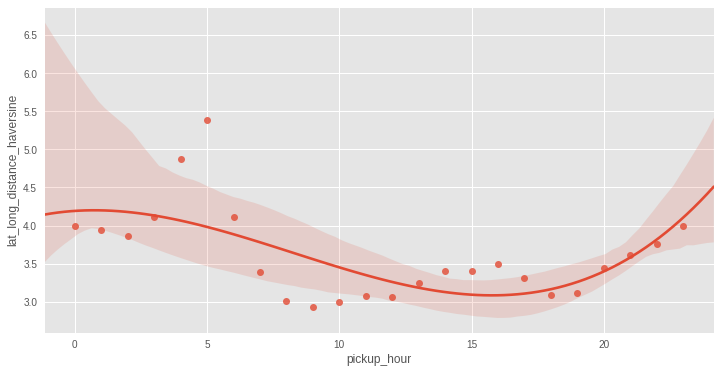

In [51]:
speed_hour = train.groupby(['pickup_hour']).mean()['lat_long_distance_haversine'].reset_index()
sns.regplot(speed_hour['pickup_hour'], speed_hour['lat_long_distance_haversine'], order=3)

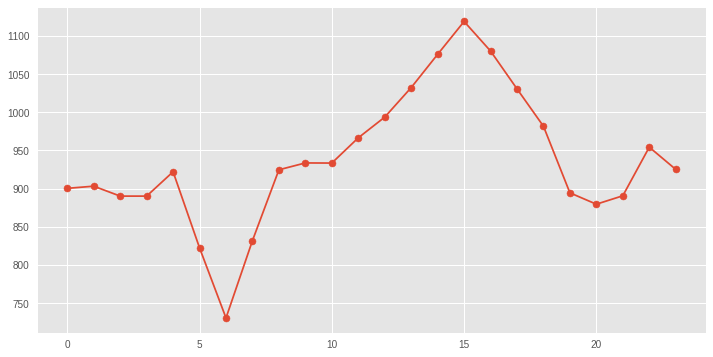

In [61]:
speed_hour = train.groupby(['pickup_hour']).mean()['trip_duration'].reset_index()
plt.scatter(speed_hour['pickup_hour'], speed_hour['trip_duration'])
plt.plot(speed_hour['pickup_hour'], speed_hour['trip_duration'])

**passenger_count vs distance**

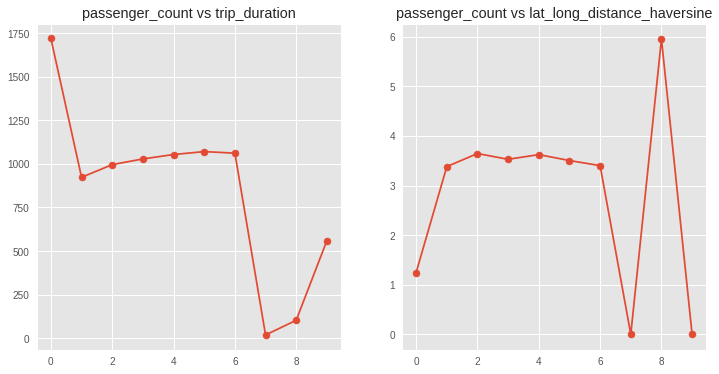

In [58]:
plt.subplot(121)
speed_hour = train.groupby(['passenger_count']).mean()['trip_duration'].reset_index()
plt.scatter(speed_hour['passenger_count'], speed_hour['trip_duration'])
plt.plot(speed_hour['passenger_count'], speed_hour['trip_duration'])
plt.title('passenger_count vs trip_duration')

plt.subplot(122)
speed_hour = train.groupby(['passenger_count']).mean()['lat_long_distance_haversine'].reset_index()
plt.scatter(speed_hour['passenger_count'], speed_hour['lat_long_distance_haversine'])
plt.plot(speed_hour['passenger_count'], speed_hour['lat_long_distance_haversine'])
plt.title('passenger_count vs lat_long_distance_haversine')

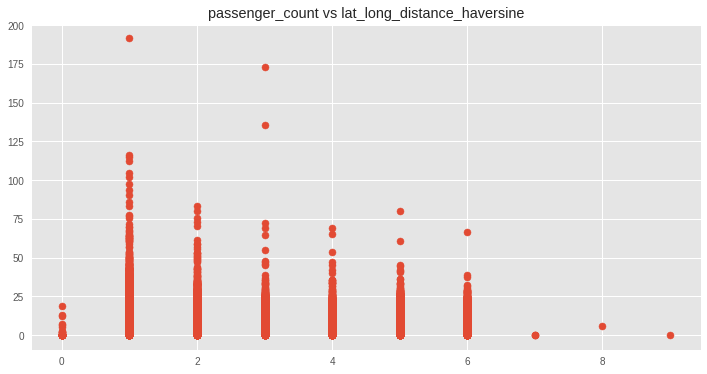

In [63]:
plt.scatter(train['passenger_count'], train['lat_long_distance_haversine'])
plt.title('passenger_count vs lat_long_distance_haversine')

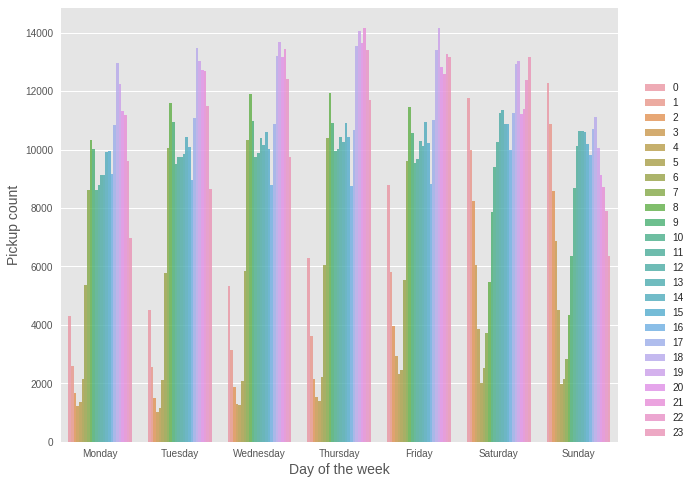

In [64]:
f = plt.figure(figsize=(10,8))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train, hue='pickup_hour', alpha=0.8)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend(loc=(1.04,0))
plt.show()

**Location Clustering**

In [39]:
train, test = data_utils.load_dataset('3')

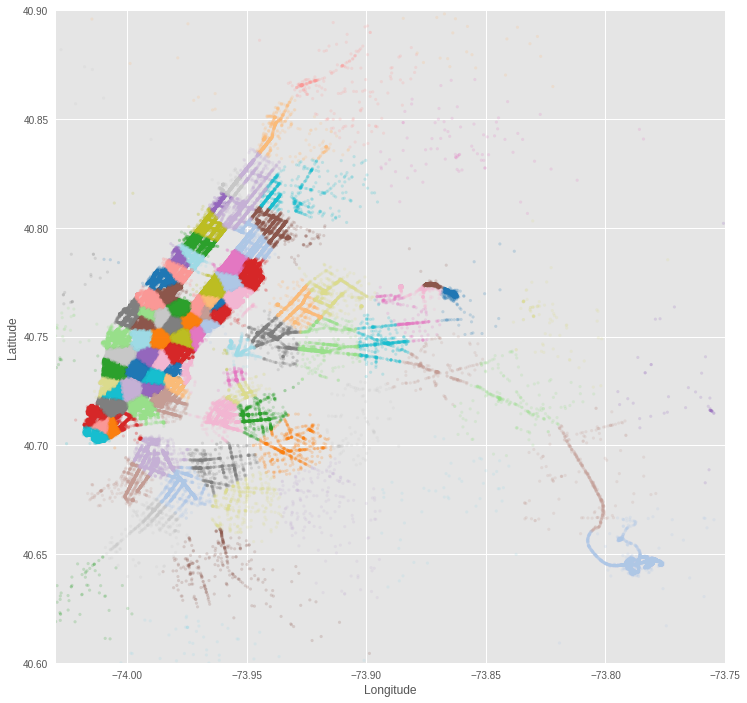

In [4]:
city_border_longitude = (-74.03, -73.75)
city_border_latitude = (40.60, 40.90)

N = test.shape[0]
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figwidth(12)
fig.set_figheight(12)
ax.scatter(train.pickup_longitude.values[:N], train.pickup_latitude.values[:N], s=10, lw=0,
           c=train['pickup_kmeans_100_cluster'][:N].values, cmap='tab20', alpha=0.2)
ax.set_xlim(city_border_longitude)
ax.set_ylim(city_border_latitude)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

**cluster 中的平均速度和拥挤程度**

In [11]:
train['average_speed'] = train['lat_long_distance_haversine'] / train['trip_duration']

In [12]:
train['average_speed'].describe()

count    1.458644e+06
mean     4.006447e-03
std      4.160423e-03
min      0.000000e+00
25%      2.533687e-03
50%      3.553327e-03
75%      4.956920e-03
max      2.576344e+00
Name: average_speed, dtype: float64

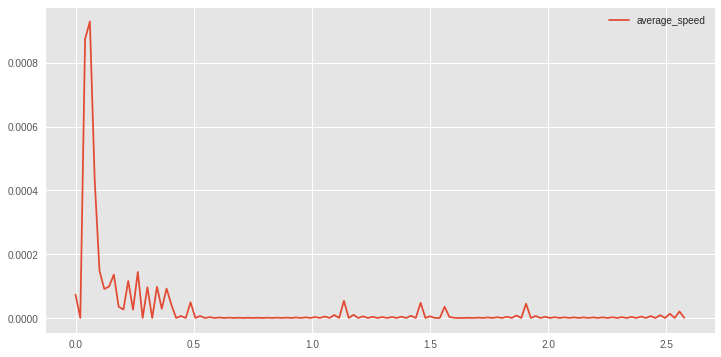

In [13]:
sns.kdeplot(train['average_speed'])

In [18]:
pickup_cluster_average_speed = train.groupby(['pickup_kmeans_100_cluster'])['average_speed'].mean().reset_index()
dropoff_cluster_average_speed = train.groupby(['dropoff_kmeans_100_cluster'])['average_speed'].mean().reset_index()

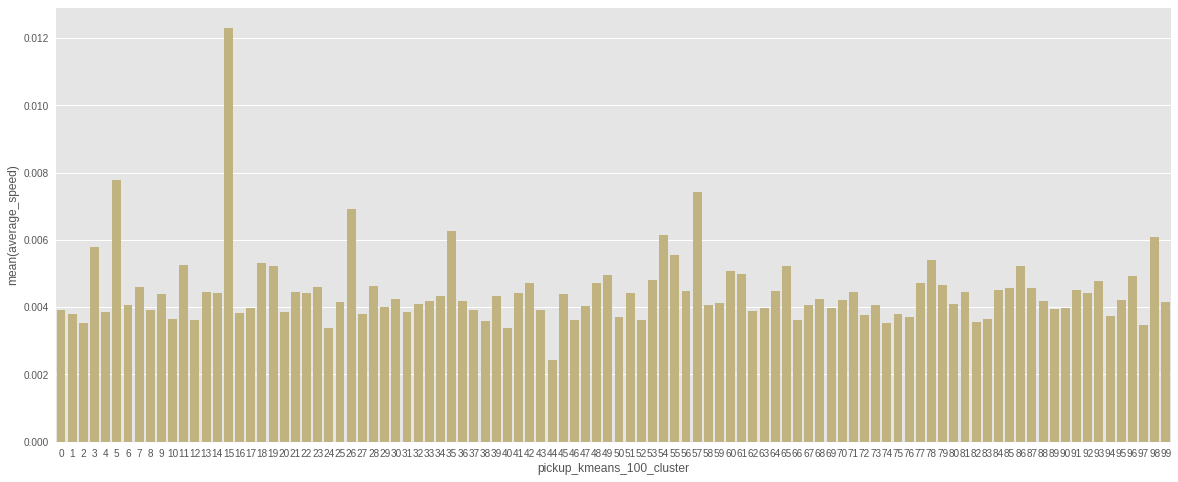

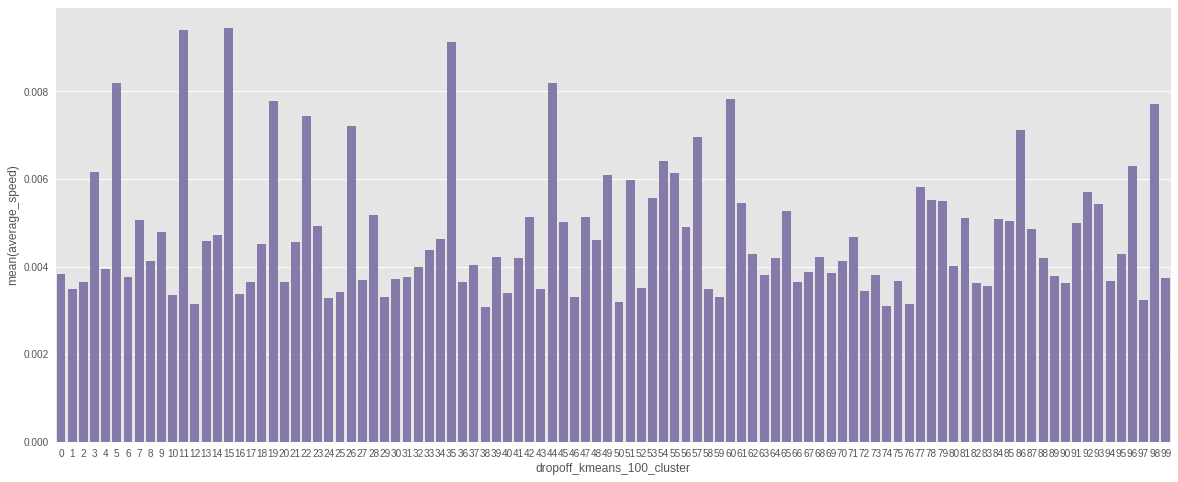

In [32]:
plt.figure(figsize=(20, 8))
sns.barplot(pickup_cluster_average_speed['pickup_kmeans_100_cluster'], pickup_cluster_average_speed['average_speed'], color=color[4])
plt.show()
plt.figure(figsize=(20, 8))
sns.barplot(dropoff_cluster_average_speed['dropoff_kmeans_100_cluster'], dropoff_cluster_average_speed['average_speed'], color=color[3])

(0, 0.015)

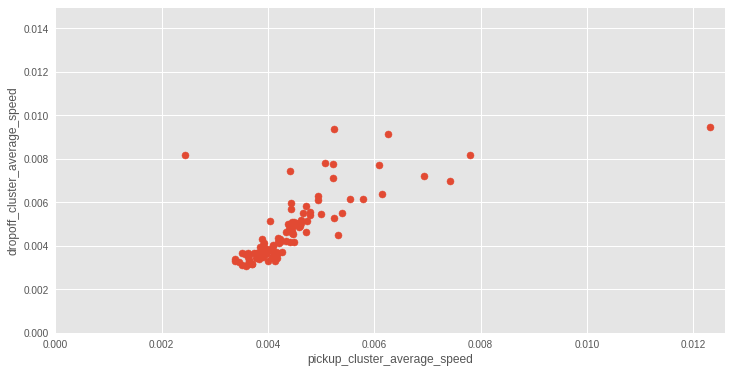

In [25]:
plt.scatter(pickup_cluster_average_speed['average_speed'], dropoff_cluster_average_speed['average_speed'])
plt.xlabel('pickup_cluster_average_speed')
plt.ylabel('dropoff_cluster_average_speed')
plt.xlim([0, 0.0126])
plt.ylim([0, 0.015])

测试发现, cluster 的平均速度的特征线上线下爆炸!

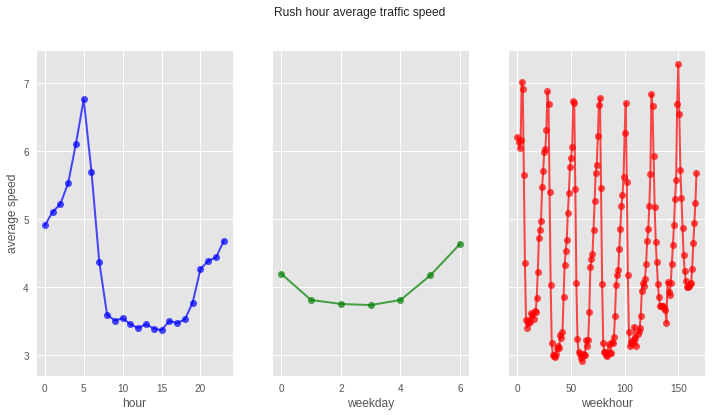

In [40]:
train.loc[:, 'avg_speed_h'] = 1000 * train['lat_long_distance_haversine'] / train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000 * train['lat_long_distance_dummy_manhattan'] / train['trip_duration']
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train.groupby('pickup_hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(train.groupby('pickup_weekday').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(train.groupby('pickup_week_hour').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[2].set_xlabel('weekhour')
ax[0].set_ylabel('average speed')
fig.suptitle('Rush hour average traffic speed')
plt.show()

**time feature engineering**

In [3]:
train, test = data_utils.load_dataset(op_scope='3')
print 'train: {}, test: {}'.format(train.shape, test.shape)
trip_durations = train['trip_duration']
del train['trip_duration']
conbined_data = pd.concat([train, test])

train: (1458644, 96), test: (625134, 95)


In [4]:
conbined_data['pickup_datetime'] = pd.to_datetime(conbined_data['pickup_datetime'])

In [5]:
train = conbined_data.iloc[:train.shape[0], :]
test = conbined_data.iloc[train.shape[0]:, :]

group_freq = '60min'
train.loc[:, 'pickup_datetime_group'] = train['pickup_datetime'].dt.round(group_freq)
test.loc[:, 'pickup_datetime_group'] = test['pickup_datetime'].dt.round(group_freq)

In [6]:
df_all = pd.concat((train, test))[['id', 'pickup_datetime', 'pickup_kmeans_100_cluster', 'dropoff_kmeans_100_cluster']]

In [7]:
df_all.head()

,id,pickup_datetime,pickup_kmeans_100_cluster,dropoff_kmeans_100_cluster
0,id2875421,2016-03-14 17:24:55,60,95
1,id2377394,2016-06-12 00:43:35,98,67
2,id3858529,2016-01-19 11:35:24,27,32
3,id3504673,2016-04-06 19:32:31,94,32
4,id2181028,2016-03-26 13:30:55,53,22


In [8]:
# Count trips over 60min
df_counts = df_all.set_index('pickup_datetime')[['id']].sort_index()

In [9]:
df_counts.head()

,id
pickup_datetime,
2016-01-01 00:00:17,id0190469
2016-01-01 00:00:22,id0621643
2016-01-01 00:00:28,id1384355
2016-01-01 00:00:53,id1665586
2016-01-01 00:01:01,id1210365


In [12]:
df_counts['count_60min'] = df_counts.isnull().rolling('60min').count()['id']

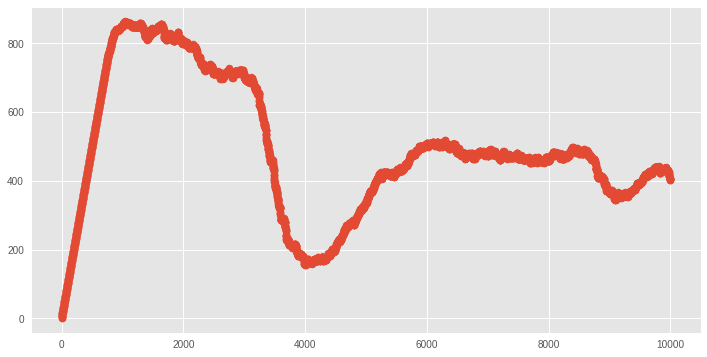

In [25]:
plt.scatter(range(len(df_counts.count_60min.values.tolist()[:10000])), df_counts.count_60min.values.tolist()[:10000])